In [225]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeClassifier , plot_tree 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from ucimlrepo import fetch_ucirepo 


In [226]:
  
 
df = pd.read_csv("ai4i2020.csv")
# metadata 


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [228]:
df.head(10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [229]:
df.shape


(10000, 14)

In [230]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [231]:
df.duplicated().sum()

np.int64(0)

In [232]:
df['Type'] = df['Type'].map({'L': 0, 'M': 1, 'H': 2})
dropped = ['Product ID', 'TWF', 'UDI', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure']
x = df.drop(columns=dropped)
y = df['Machine failure']




In [233]:
scaler = StandardScaler()

numerical_cols = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']


x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train[numerical_cols]=scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols]=scaler.transform(x_test[numerical_cols])





In [234]:
# linear Reg
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2 score : {r2_score(y_test,y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


MAE: 0.08
R2 score : 0.12
MSE: 0.03


Accuracy: 97.3%
confusion_matrix
[[1930    9]
 [  45   16]]


<Axes: >

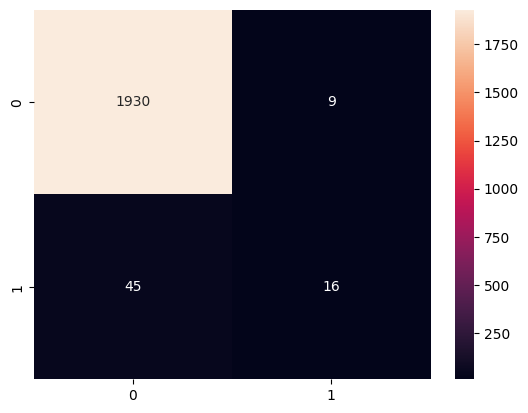

In [235]:
# logstic
model2 = LogisticRegression()

model2.fit(x_train,y_train)

y_pred = model2.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}%")

print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, fmt='d')


Accuracy: 97.5%
confusion_matrix: [[1935    4]
 [  46   15]]
classification_report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.79      0.25      0.38        61

    accuracy                           0.97      2000
   macro avg       0.88      0.62      0.68      2000
weighted avg       0.97      0.97      0.97      2000



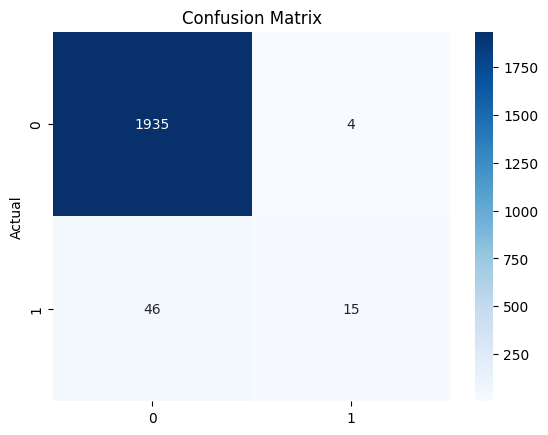

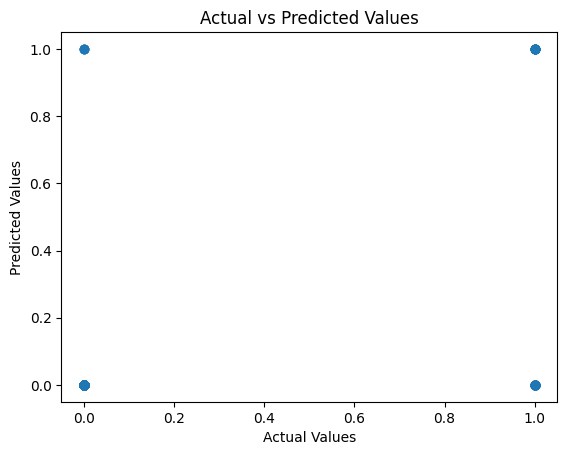

In [236]:

model3 = DecisionTreeClassifier(
    criterion='gini',        # or 'entropy'
    max_depth=3,             # Prevent overfitting
    min_samples_split=2,     # Minimum samples to split
    min_samples_leaf=1,      # Minimum samples in leaf
    random_state=42
)

clf = model3.fit(x_train,y_train)

y_pred = model3.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred) *100}%")
print(f"confusion_matrix: {confusion_matrix(y_test,y_pred)}")
print(f"classification_report:\n{classification_report(y_test, y_pred)}")
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()





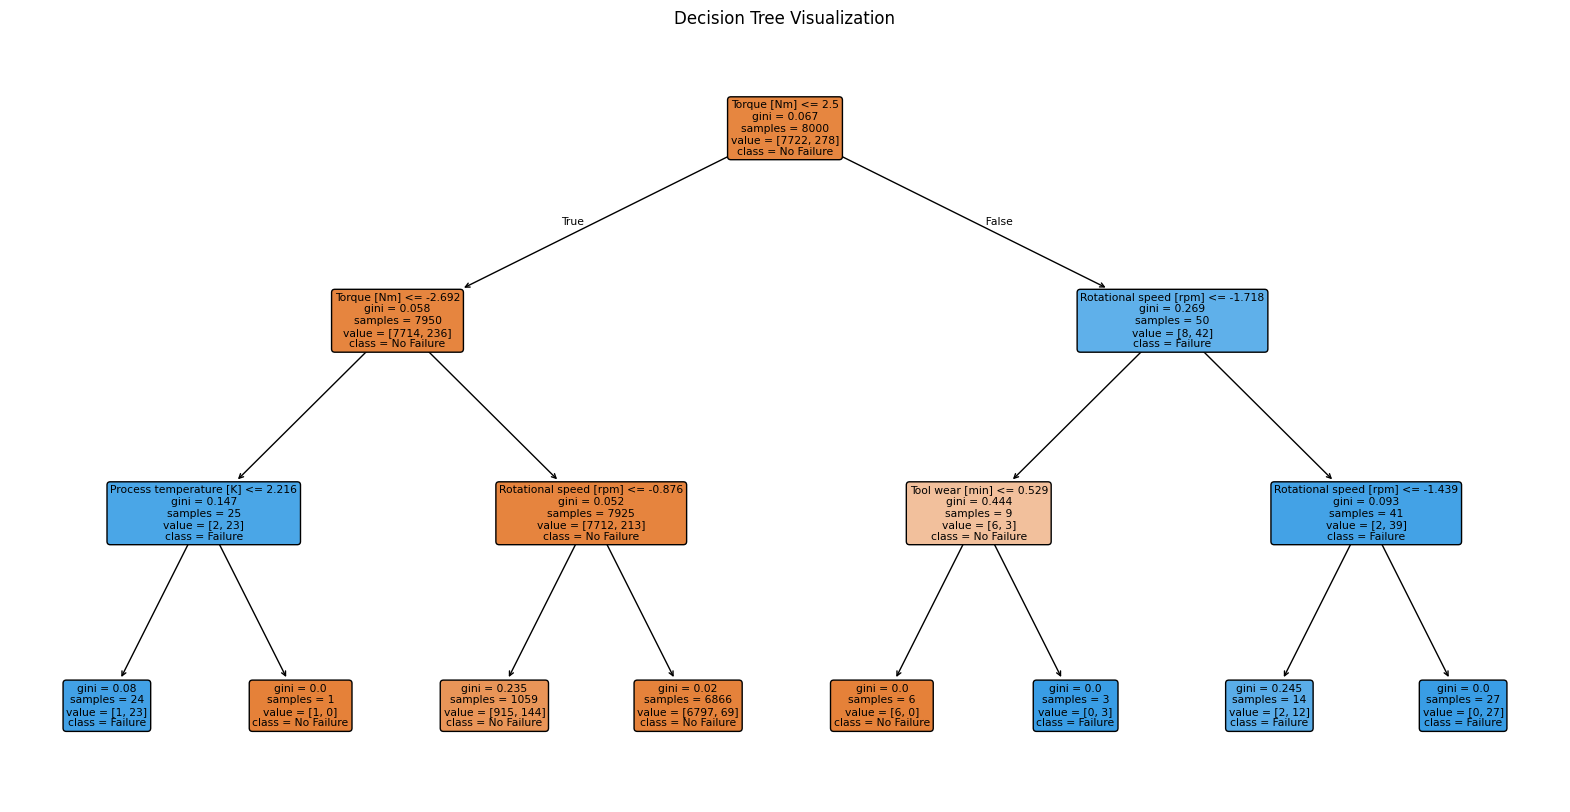

In [237]:

plt.figure(figsize=(20, 10))
class_labels = ['No Failure', 'Failure']
plot_tree(model3, filled=True, feature_names=x.columns, class_names=class_labels, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [238]:
# knn
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(f"KNN Accuracy: {accuracy_score(y_test,y_pred) *100}%")


KNN Accuracy: 97.89999999999999%


In [239]:
# nave bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test,y_pred) *100}%")


Naive Bayes Accuracy: 96.5%
